# Irish Data Analysis

- Modelling the irish Dataset with Supervised Machine Algorithm:(Logistic Model,  Support Vector Machine, Random Forest)
- Author: E E Ajaegbu
- Email: ajaegbu35@gmail.com



In [1]:
# Core Libraries
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data file into Python

In [2]:
Iris = pd.read_csv("C:/Users/hp/Desktop/Data/iris.csv")
Iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking Information About the Data
print(Iris.info())
print("\n\n")

# Basic Summary Statistics
print(Iris.describe())

# Checking for missing values
print("\n\n Checking for Mising Values \n")
print(Iris.isnull().sum())

# Checking for uinque values
print("\n\n Categores of Iris Flower \n",Iris.Species.unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None



               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000 

### Checking Relationships Among the Indepednet varaible
- Ideally, We need the regressor variable to have Zero Correlation Among themselve, this will helps us to elimonate Redundancy.

#### Converting the the Categorical Target Variable to a Dicrete Variable

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
lb = LabelEncoder()
Iris["Target"]= lb.fit_transform(Iris["Species"])

In [6]:
Iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0


### Correlation Analysis

In [7]:
Iris.iloc[:,1:6].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Scatter Diagram

#### Sepal Length Vs Sepal Width

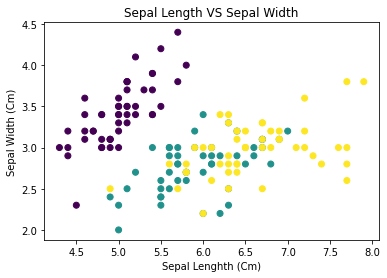

In [8]:
plt.scatter(Iris["SepalLengthCm"],Iris["SepalWidthCm"],c=Iris["Target"])
plt.xlabel("Sepal Lenghth (Cm)")
plt.ylabel("Sepal Width (Cm)")
plt.title("Sepal Length VS Sepal Width")
plt.show()

#### Sepal Length Vs Peatal Length

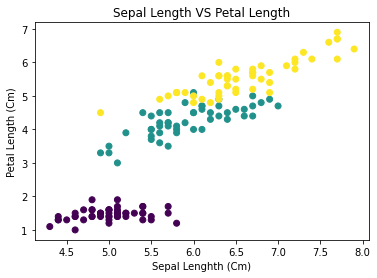

In [9]:
plt.scatter(Iris["SepalLengthCm"],Iris["PetalLengthCm"],c=Iris["Target"])
plt.xlabel("Sepal Lenghth (Cm)")
plt.ylabel("Petal Length (Cm)")
plt.title("Sepal Length VS Petal Length")
plt.show()

#### Sepal Length Vs Peatal Width

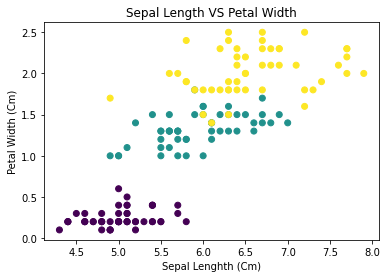

In [10]:
plt.scatter(Iris["SepalLengthCm"],Iris["PetalWidthCm"],c=Iris["Target"])
plt.xlabel("Sepal Lenghth (Cm)")
plt.ylabel("Petal Width (Cm)")
plt.title("Sepal Length VS Petal Width")
plt.show()

#### Sepal Width VS Petal Length

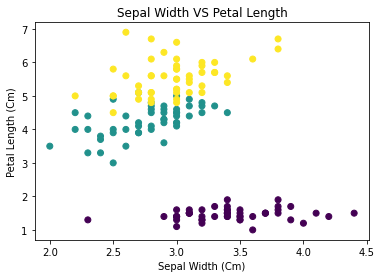

In [11]:
plt.scatter(Iris["SepalWidthCm"],Iris["PetalLengthCm"],c=Iris["Target"])
plt.xlabel("Sepal Width (Cm)")
plt.ylabel("Petal Length (Cm)")
plt.title("Sepal Width VS Petal Length")
plt.show()

#### Sepal Width VS Petal Width

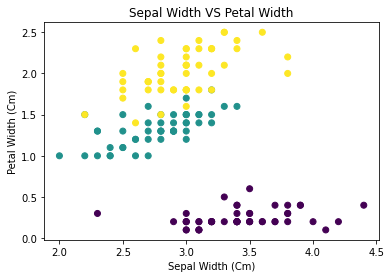

In [12]:
plt.scatter(Iris["SepalWidthCm"],Iris["PetalWidthCm"],c=Iris["Target"])
plt.xlabel("Sepal Width (Cm)")
plt.ylabel("Petal Width (Cm)")
plt.title("Sepal Width VS Petal Width")
plt.show()

#### Petal Length VS Petal Width

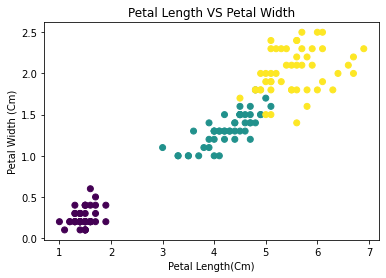

In [13]:
plt.scatter(Iris["PetalLengthCm"],Iris["PetalWidthCm"],c=Iris["Target"])
plt.xlabel("Petal Length(Cm)")
plt.ylabel("Petal Width (Cm)")
plt.title("Petal Length VS Petal Width")
plt.show()

In [14]:
# Creating an array of indepednet and dependent variables.
X = Iris.iloc[:,1:5].values
y= Iris.iloc[:,6].values

X.shape,y.shape

((150, 4), (150,))

In [15]:
# Splitting the Data into training and test set
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((112, 4), (38, 4), (112,), (38,))

#### a)Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [18]:
logistic = LogisticRegression().fit(X_train,y_train)

print(logistic.score(X_train,y_train),"\n")
print(logistic.score(X_test,y_test),"\n")

y_predicted = logistic.predict(X_test)
Acc= accuracy_score(y_test,y_predicted)
conf = confusion_matrix(y_test,y_predicted)

print(Acc)
print("\n",conf)

0.9821428571428571 

0.9736842105263158 

0.9736842105263158

 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


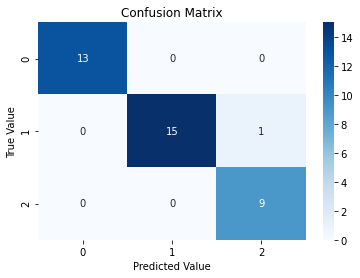

In [19]:
sns.heatmap(conf ,annot=True,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

plt.show()

#### B) Support Vector Machine

In [20]:
svm = SVC().fit(X_train,y_train)

print(svm.score(X_train,y_train),"\n")
print(svm.score(X_test,y_test),"\n")

y_predicted =svm.predict(X_test)
Acc= accuracy_score(y_test,y_predicted)
conf = confusion_matrix(y_test,y_predicted)

print(Acc)
print("\n",conf)

0.9642857142857143 

0.9736842105263158 

0.9736842105263158

 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


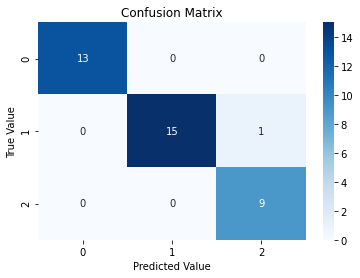

In [21]:
sns.heatmap(conf ,annot=True,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

plt.show()

#### C) Random Forest

In [22]:
rfc = RandomForestClassifier().fit(X_train,y_train)

print(rfc.score(X_train,y_train),"\n")
print(rfc.score(X_test,y_test),"\n")

y_predicted =rfc.predict(X_test)
Acc= accuracy_score(y_test,y_predicted)
conf = confusion_matrix(y_test,y_predicted)

print(Acc)
print("\n",conf)

1.0 

0.9736842105263158 

0.9736842105263158

 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


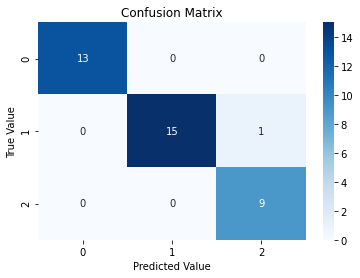

In [23]:
sns.heatmap(conf ,annot=True,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

plt.show()

## HYPER PARAMETER TUNING
- Using Gridserach CV

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#### A) Logistic Regression

In [25]:
# Searching for the best parameter for the logistic model

logRegSearch = GridSearchCV(LogisticRegression(max_iter=2000,penalty = 'l2'),{"solver":['newton-cg', 'lbfgs',\
                                        'liblinear', 'sag', 'saga']},cv=10,return_train_score=False)
logRegSearch.fit(X,y)


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=2000),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [26]:
pd.DataFrame(logRegSearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.061812,0.020613,0.000651,0.000391,newton-cg,{'solver': 'newton-cg'},1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.000000,1.0,1.0,0.973333,0.03266,1
1,0.108866,0.051330,0.001350,0.001731,lbfgs,{'solver': 'lbfgs'},1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.000000,1.0,1.0,0.973333,0.03266,1
2,0.002973,0.004608,0.000700,0.000641,liblinear,{'solver': 'liblinear'},1.0,1.000000,1.0,0.933333,0.933333,0.933333,0.800000,0.933333,1.0,1.0,0.953333,0.06000,5
3,0.222879,0.116319,0.001600,0.001157,sag,{'solver': 'sag'},1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.000000,1.0,1.0,0.973333,0.03266,1
4,0.720045,0.153369,0.002500,0.002511,saga,{'solver': 'saga'},1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.000000,1.0,1.0,0.973333,0.03266,1


In [27]:
print("Best Parameters :", logRegSearch.best_params_,"\n")
print("Best Scores:  ", logRegSearch.best_score_)

Best Parameters : {'solver': 'newton-cg'} 

Best Scores:   0.9733333333333334


#### B) Support Vector Machine

In [28]:
# Searching for the best parameter for the Support Vector Machine model
svcSearch= GridSearchCV(SVC(),{"C":range(1,100,1),"kernel":["linear","rbf","poly","sigmoid"],"gamma":['auto',"scale"]},cv=5,\
                  return_train_score=False)
svcSearch.fit(X,y)
svcSearch.cv_results_

{'mean_fit_time': array([0.00370026, 0.01280174, 0.03120337, 0.01350121, 0.00810013,
        0.00420008, 0.00980072, 0.00920143, 0.01270108, 0.0042007 ,
        0.01590075, 0.00870042, 0.01300206, 0.03140388, 0.00760164,
        0.01160002, 0.01480203, 0.01139994, 0.01730185, 0.0080009 ,
        0.00380054, 0.00490046, 0.00420074, 0.02270279, 0.01780176,
        0.02220254, 0.03440361, 0.00890121, 0.00379963, 0.00420032,
        0.00470171, 0.00929947, 0.00520334, 0.00389962, 0.02400427,
        0.00880027, 0.00379987, 0.00420046, 0.00400043, 0.01630235,
        0.00349979, 0.0044014 , 0.04020815, 0.00840077, 0.00379992,
        0.00510077, 0.00560026, 0.01150088, 0.00580015, 0.00380001,
        0.04540515, 0.00870109, 0.0036006 , 0.00490046, 0.00390048,
        0.01380181, 0.01360178, 0.00420074, 0.03450465, 0.0122014 ,
        0.00500093, 0.01630192, 0.00549984, 0.00960126, 0.00320077,
        0.00400009, 0.05560699, 0.00800014, 0.00349965, 0.00490003,
        0.00530005, 0.01150041,

In [29]:
pd.DataFrame(svcSearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003700,0.000600,0.016604,0.029710,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,7
1,0.012802,0.016605,0.002300,0.000245,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,7
2,0.031203,0.038250,0.015302,0.025854,1,auto,poly,"{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,156
3,0.013501,0.007058,0.006002,0.005263,1,auto,sigmoid,"{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.333333,0.1,0.000000,0.033333,0.0,0.093333,0.125433,595
4,0.008100,0.007985,0.002001,0.000548,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0.007803,0.004784,0.001101,0.000199,99,auto,sigmoid,"{'C': 99, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.333333,0.1,0.000000,0.033333,0.0,0.093333,0.125433,595
788,0.003200,0.000749,0.001400,0.000490,99,scale,linear,"{'C': 99, 'gamma': 'scale', 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,156
789,0.008203,0.006850,0.001201,0.000246,99,scale,rbf,"{'C': 99, 'gamma': 'scale', 'kernel': 'rbf'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,44
790,0.011901,0.010107,0.001300,0.000245,99,scale,poly,"{'C': 99, 'gamma': 'scale', 'kernel': 'poly'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,156


In [30]:
print("Best Parameters :", svcSearch.best_params_,"\n")
print("Best Scores:  ", svcSearch.best_score_)

Best Parameters : {'C': 4, 'gamma': 'auto', 'kernel': 'rbf'} 

Best Scores:   0.9866666666666667


#### C)Random Forest

In [31]:
rforestSearch= GridSearchCV(RandomForestClassifier(),{"n_estimators":range(1,101,1),"criterion":["gini", "entropy"]},\
                           cv=5, return_train_score=False)
rforestSearch.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': range(1, 101)})

In [32]:
pd.DataFrame(rforestSearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006405,0.000797,0.001799,0.000400,gini,1,"{'criterion': 'gini', 'n_estimators': 1}",0.966667,0.966667,0.900000,0.833333,1.0,0.933333,0.059628,199
1,0.010508,0.001787,0.001799,0.000399,gini,2,"{'criterion': 'gini', 'n_estimators': 2}",0.966667,0.966667,0.933333,0.866667,1.0,0.946667,0.045216,185
2,0.013604,0.000858,0.003000,0.000632,gini,3,"{'criterion': 'gini', 'n_estimators': 3}",0.966667,0.966667,0.866667,0.900000,1.0,0.940000,0.048990,195
3,0.017606,0.001020,0.003300,0.001662,gini,4,"{'criterion': 'gini', 'n_estimators': 4}",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,77
4,0.023705,0.002580,0.002900,0.000200,gini,5,"{'criterion': 'gini', 'n_estimators': 5}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.435681,0.088617,0.031804,0.000511,entropy,96,"{'criterion': 'entropy', 'n_estimators': 96}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
196,0.384372,0.049326,0.027608,0.002080,entropy,97,"{'criterion': 'entropy', 'n_estimators': 97}",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,60
197,0.361887,0.006434,0.028602,0.001356,entropy,98,"{'criterion': 'entropy', 'n_estimators': 98}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
198,0.629118,0.154401,0.052107,0.012613,entropy,99,"{'criterion': 'entropy', 'n_estimators': 99}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1


In [33]:
print("Best Parameters :", rforestSearch.best_params_,"\n")
print("Best Scores:  ", rforestSearch.best_score_)

Best Parameters : {'criterion': 'gini', 'n_estimators': 5} 

Best Scores:   0.9666666666666668


### Model Selection Using GridsearchCVM

In [34]:

## Logistic Regression
lr_model= LogisticRegression(max_iter=2000,penalty='l2')
lr_par = {"solver":['newton-cg', 'lbfgs','liblinear', 'sag', 'saga']}
logist_spec={"model":lr_model,"params":lr_par}

## SVM Model Specification
svm_model=SVC()
svm_par ={"C":range(1,100,1),"kernel":["linear","rbf","poly","sigmoid"],"gamma":['auto',"scale"]}
svm_spec= {"model":svm_model,"params":svm_par}

## Random Forest Specification
rdf_model =RandomForestClassifier()
rdf_par = {"n_estimators":range(1,101,1),"criterion":["gini", "entropy"]}
rdf_spec={"model":rdf_model,"params":rdf_par }


modelpar= {"Logistic":logist_spec,"SVM":svm_spec,"Randomforest":rdf_spec}
modelpar

{'Logistic': {'model': LogisticRegression(max_iter=2000),
  'params': {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}},
 'SVM': {'model': SVC(),
  'params': {'C': range(1, 100),
   'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
   'gamma': ['auto', 'scale']}},
 'Randomforest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': range(1, 101), 'criterion': ['gini', 'entropy']}}}

In [35]:
best_model_par={}
best_model_score ={}

for i in modelpar.keys():
    rc= GridSearchCV(modelpar[i]["model"],modelpar[i]["params"],cv=5,return_train_score=False)
    rc.fit(X,y)
    best_model_par[i]= rc.best_params_
    best_model_score[i]= rc.best_score_
    print

In [36]:
       
print(best_model_par)
print(best_model_score)

{'Logistic': {'solver': 'newton-cg'}, 'SVM': {'C': 4, 'gamma': 'auto', 'kernel': 'rbf'}, 'Randomforest': {'criterion': 'gini', 'n_estimators': 1}}
{'Logistic': 0.9733333333333334, 'SVM': 0.9866666666666667, 'Randomforest': 0.9666666666666668}
